In [1]:
from openbb_terminal.sdk import openbb

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [8]:
# Grab data and compute the return
data = openbb.stocks.load(
    # "JPM, SPY",
    "JPM",
    start_date="2014-01-01",
    end_date="2022-12-31"
)

data_bench = openbb.stocks.load(
    # "JPM, SPY",
    "SPY",
    start_date="2014-01-01",
    end_date="2022-12-31"
)

asset = data["Adj Close"]
benchmark = data_bench["Adj Close"]

asset_returns = asset.pct_change().dropna()
benchmark_returns = benchmark.pct_change().dropna()

Loading Daily data for JPM with starting period 2014-01-02.

Loading Daily data for SPY with starting period 2014-01-02.

In [9]:
# Start coputing beta
bm_cov = benchmark_returns.rolling(
    window=30
).cov(asset_returns)

bm_var = benchmark_returns.rolling(
    window=30
).var()

beta = bm_cov / bm_var

<AxesSubplot:xlabel='date'>

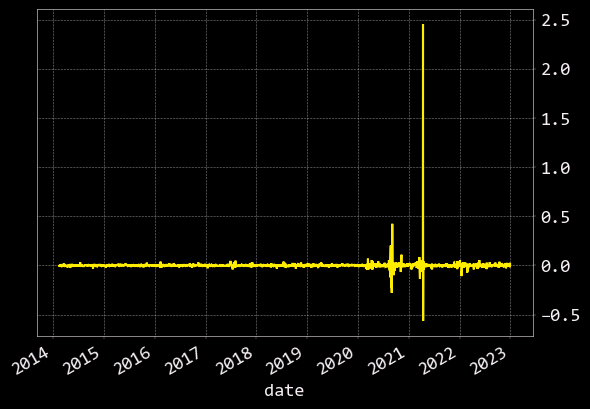

In [10]:
# Compute Treynor ratio
treynor = (
    asset_returns - benchmark_returns
) / beta

treynor.plot()